In [2]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 0. Описание задачи

Исходная таблица с данными содержит статистику по сотрудникам. Необходимо по значениям признаков узнать, покинет ли сотрудник компанию в ближайшие два года.

Признаки:
* Education - уровень образования сотрудника {Bachelors, Masters, Phd}
* JoiningYear - год начала работы в компании {2012, 2013, 2014, 2015, 2016, 2017, 2018}
* City - город, в котором работает сотрудник {Bangalore, Pune, New Delhi}
* PaymentTier - уровень оплаты {1, 2, 3}
* Age - возраст сотрудника
* Gender - пол сотрудника {Male, Female}
* EverBenched - находился ли сотрудник "в запасе" (не работал ни над одним из проектов)
* ExperienceInCurrentDomain - опыт сотрудника в текущем проекте
* LeaveOrNot - покинул ли сотрудник организацию

In [3]:
data_raw = pd.read_csv("./LostData.csv")
data_raw.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,0
1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,NaN,1
2,Bachelors,2014.0,New Delhi,3.0,38.0,Female,No,2.0,0
3,Masters,2016.0,Bangalore,3.0,27.0,Male,No,5.0,1
4,NaN,2017.0,Pune,3.0,24.0,Male,Yes,2.0,1


In [4]:
data_raw.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013.0,Bangalore,3.0,26.0,Female,No,4.0,0
4649,Masters,2013.0,Pune,2.0,37.0,Male,No,2.0,1
4650,Masters,2018.0,New Delhi,3.0,27.0,Male,No,5.0,1
4651,Bachelors,2012.0,Bangalore,3.0,30.0,Male,Yes,2.0,0
4652,Bachelors,2015.0,Bangalore,3.0,33.0,Male,Yes,4.0,0


In [5]:
data_raw.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [6]:
data_raw.nunique() # Количество уникальных значений каждого признака

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4583 non-null   object 
 1   JoiningYear                4602 non-null   float64
 2   City                       4596 non-null   object 
 3   PaymentTier                4600 non-null   float64
 4   Age                        4597 non-null   float64
 5   Gender                     4595 non-null   object 
 6   EverBenched                4598 non-null   object 
 7   ExperienceInCurrentDomain  4588 non-null   float64
 8   LeaveOrNot                 4653 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 327.3+ KB


In [21]:
# data_raw['Education'] = data_raw['Education'].astype('category') # Замена типов на категориальные (почти все значения имеют категориальный или бинарный типы)
# data_raw['City'] = data_raw['City'].astype('category')
# data_raw['PaymentTier'] = data_raw['PaymentTier'].astype('category')
# data_raw['Gender'] = data_raw['Gender'].astype('category')
# data_raw['EverBenched'] = data_raw['EverBenched'].astype('category')
# data_raw['LeaveOrNot'] = data_raw['LeaveOrNot'].astype('category')

In [22]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  4583 non-null   category
 1   JoiningYear                4602 non-null   float64 
 2   City                       4596 non-null   category
 3   PaymentTier                4600 non-null   category
 4   Age                        4597 non-null   float64 
 5   Gender                     4595 non-null   category
 6   EverBenched                4598 non-null   category
 7   ExperienceInCurrentDomain  4588 non-null   float64 
 8   LeaveOrNot                 4653 non-null   category
dtypes: category(6), float64(3)
memory usage: 137.2 KB


In [11]:
data_raw.describe()

,JoiningYear,Age,ExperienceInCurrentDomain
count,4602.000000,4597.000000,4588.000000
mean,2015.058670,29.382641,2.902136
std,1.862717,4.821260,1.558891
min,2012.000000,22.000000,0.000000
25%,2013.000000,26.000000,2.000000
50%,2015.000000,28.000000,3.000000
75%,2017.000000,32.000000,4.000000
max,2018.000000,41.000000,7.000000


array([[<AxesSubplot:xlabel='JoiningYear', ylabel='JoiningYear'>,
        <AxesSubplot:xlabel='Age', ylabel='JoiningYear'>,
        <AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='JoiningYear'>],
       [<AxesSubplot:xlabel='JoiningYear', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='Age'>],
       [<AxesSubplot:xlabel='JoiningYear', ylabel='ExperienceInCurrentDomain'>,
        <AxesSubplot:xlabel='Age', ylabel='ExperienceInCurrentDomain'>,
        <AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='ExperienceInCurrentDomain'>]],
      dtype=object)

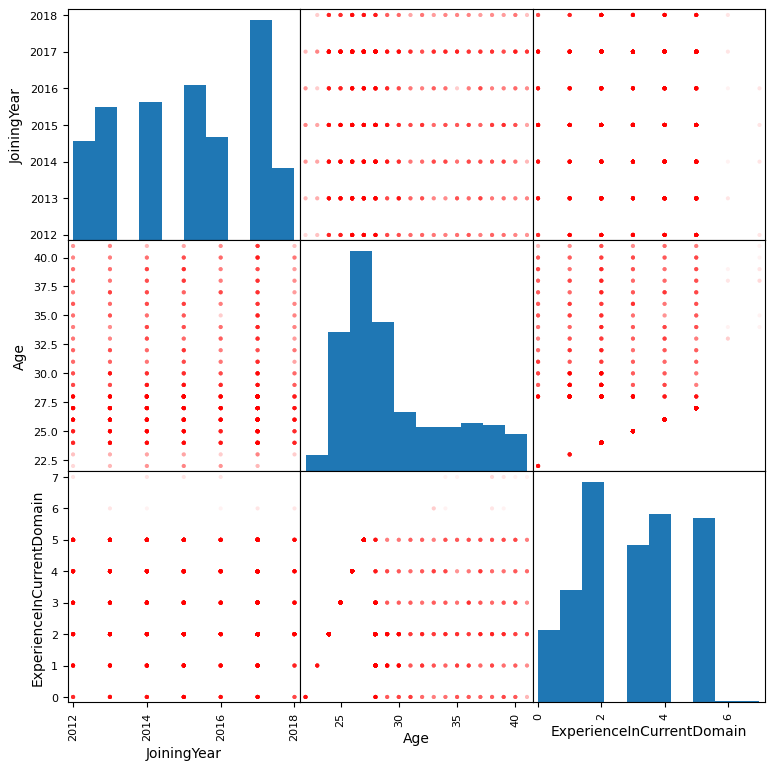

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .05, figsize = (9, 9), color='red')